# Step 0. Parameter Setting 

In [3]:
import dtnmonitor as dtn

graph_mode=1  #0 all, 1 100pt


# Step 1. Download and monitor

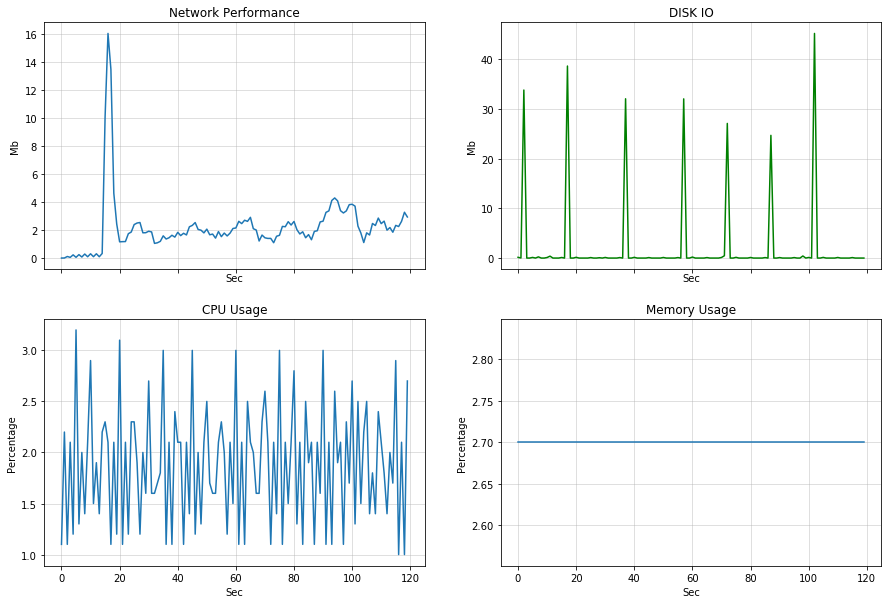

None

In [ ]:
#download
dtn.exec_command("python downloadncar.py 20170608 00 NOAA",graph_mode)
